In [3]:
import pandas as pd
df = pd.read_csv("./mushrooms.csv")
df.nunique()


class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

## h1 Lets set the null hypothesis: there is no relationship between the categorical values of the mushroom dataset. Alternate is there is a relationship

# Contigency table
the contingency table computes the relative frequency for two categorical variables

In [9]:
#use pandas
crosstab = pd.crosstab(index=df['cap-color'], columns=df['class'])
crosstab

class,e,p
cap-color,,
b,48,120
c,32,12
e,624,876
g,1032,808
n,1264,1020
p,56,88
r,16,0
u,16,0
w,720,320


## We are comparing the catagorical values frequency


In [17]:
from scipy import stats
(chi2, p, dof, _) = stats.chi2_contingency([crosstab.iloc[4].values, crosstab.iloc[1].values])
chi2


4.606286076872667

In [18]:
## here lets determine the best set of features to figure out the mushroom classification\
## problem

#lets begin be enumerating some of the features
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

### with the given columns, thery are all categorical. Lets enumerate and use a chi square test to determine the best 10 features (there are 23)

In [21]:
for col in df.columns:
    ordinal_mapping = {k: i for i, k in enumerate(df[col].unique())}
    df[col] = df[col].map(ordinal_mapping)

    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


# Few notes

here we are using \textit{enumerate}. enumerate takes the index i, and the key k, and numbers them. We are using the unique operator on each column heading to get each unqiue class, and labelling them numerically

Now that the features are numerically labelled, we can perform a chi^2

In [25]:
#its good practise to split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(columns=["class"]),
                                                df['class'],
                                                test_size=0.2,
                                                random_state=1)



,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1610,0,2,0,1,3,0,1,1,0,1,...,0,0,0,0,0,0,1,0,2,1
1939,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1
5573,0,1,4,1,6,0,0,0,8,1,...,3,2,1,0,0,0,1,4,3,3
7076,0,0,4,1,6,0,0,0,8,1,...,0,2,1,0,0,0,1,4,3,6
2000,0,2,0,0,3,0,0,1,4,1,...,0,1,2,0,0,0,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,4,1,4,1,6,0,0,0,8,1,...,0,0,0,0,0,0,1,4,3,3
5192,0,1,0,1,7,0,0,0,8,1,...,0,0,0,0,0,0,1,4,3,3
3980,3,1,3,1,4,0,0,1,3,0,...,3,4,4,0,0,0,2,3,3,1
235,0,2,2,0,2,0,1,0,4,1,...,0,0,0,0,0,0,0,1,3,3


In [58]:
from sklearn.feature_selection import chi2
c2, p = chi2(xtrain, ytrain)

print(c2)
print(p)

##now lets match with the index of the data frame columns
c2_series = pd.Series(c2)
c2_series.index = df.drop(columns=["class"]).columns
sorted_val = c2_series.sort_values(ascending=False)

p_series = pd.Series(p)
p_series.index = df.drop(columns=["class"]).columns
p_series.sort_values(ascending=True)

selected_columns = sorted_val[0:10]
selected_columns.index

df2 = df[selected_columns.index]

xtrain, xtest, ytrain, ytest = train_test_split(df2,
                                                df['class'],
                                                test_size=0.2,
                                                random_state=1)



[ 125.01769683  122.00066143   17.85269461  669.68915186 1452.27682567
   95.46305815  701.35971343  573.62822042 1870.54755734   30.45648509
  559.46139749 2481.13603138 3259.22011341  729.09294001  177.68608502
           nan  156.73096107  160.93729947 1791.47701361 2773.59825177
  112.3196528   224.46153749]
[5.04428234e-029 2.30760957e-028 2.38681049e-005 1.16736242e-147
 0.00000000e+000 1.50676928e-022 1.51365166e-154 9.12190576e-127
 0.00000000e+000 3.41439998e-008 1.10098976e-123 0.00000000e+000
 0.00000000e+000 1.41069998e-160 1.55117051e-040             nan
 5.86055584e-036 7.06095292e-037 0.00000000e+000 0.00000000e+000
 3.04106279e-026 9.62169955e-051]


# Lets apply a model

now that we know the best 10 features, by using the chi2 value as a metric, lets see how our classification model works. Lets use a decision tree


0.992







[Text(167.4, 195.696, 'X[5] <= 3.5\ngini = 0.499\nsamples = 6499\nvalue = [3111, 3388]'),
 Text(125.55000000000001, 152.208, 'X[5] <= 0.5\ngini = 0.149\nsamples = 3686\nvalue = [298, 3388]'),
 Text(83.7, 108.72, 'gini = 0.0\nsamples = 210\nvalue = [210, 0]'),
 Text(167.4, 108.72, 'X[1] <= 4.5\ngini = 0.049\nsamples = 3476\nvalue = [88, 3388]'),
 Text(83.7, 65.232, 'X[6] <= 7.0\ngini = 0.02\nsamples = 3309\nvalue = [33, 3276]'),
 Text(41.85, 21.744, 'gini = 0.016\nsamples = 3303\nvalue = [27, 3276]'),
 Text(125.55000000000001, 21.744, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(251.10000000000002, 65.232, 'X[1] <= 5.5\ngini = 0.442\nsamples = 167\nvalue = [55, 112]'),
 Text(209.25, 21.744, 'gini = 0.0\nsamples = 55\nvalue = [55, 0]'),
 Text(292.95, 21.744, 'gini = 0.0\nsamples = 112\nvalue = [0, 112]'),
 Text(209.25, 152.208, 'gini = 0.0\nsamples = 2813\nvalue = [2813, 0]')]

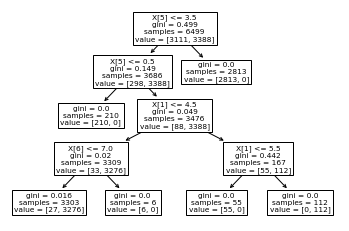

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="gini", max_depth=4, 
                       random_state = 2)

clf = clf.fit(xtrain, ytrain)
print(clf.score(xtest, ytest))

print("\n\n\n\n")

tree.plot_tree(clf)

Now comparing the results from the backhalve of the selected features.

0.963076923076923







[Text(147.47142857142856, 195.696, 'X[7] <= 2.5\ngini = 0.499\nsamples = 6499\nvalue = [3111, 3388]'),
 Text(47.82857142857143, 152.208, 'X[1] <= 0.5\ngini = 0.295\nsamples = 1630\nvalue = [293, 1337]'),
 Text(31.885714285714286, 108.72, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(63.77142857142857, 108.72, 'X[1] <= 2.5\ngini = 0.216\nsamples = 1525\nvalue = [188, 1337]'),
 Text(31.885714285714286, 65.232, 'X[10] <= 4.5\ngini = 0.145\nsamples = 1412\nvalue = [111, 1301]'),
 Text(15.942857142857143, 21.744, 'gini = 0.125\nsamples = 1394\nvalue = [93, 1301]'),
 Text(47.82857142857143, 21.744, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(95.65714285714286, 65.232, 'X[0] <= 2.5\ngini = 0.434\nsamples = 113\nvalue = [77, 36]'),
 Text(79.71428571428572, 21.744, 'gini = 0.0\nsamples = 77\nvalue = [77, 0]'),
 Text(111.6, 21.744, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(247.11428571428573, 152.208, 'X[0] <= 3.5\ngini = 0.488\nsamples = 4869\nvalue = [2818, 2051]'),
 

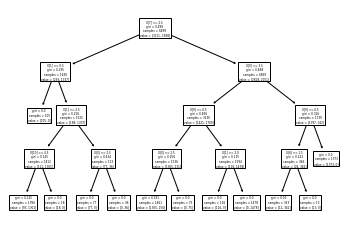

In [60]:
selected_columns = sorted_val[10:]
selected_columns.index

df2 = df[selected_columns.index]

xtrain, xtest, ytrain, ytest = train_test_split(df2,
                                                df['class'],
                                                test_size=0.2,
                                                random_state=1)
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, 
                       random_state = 2)

clf = clf.fit(xtrain, ytrain)
print(clf.score(xtest, ytest))

print("\n\n\n\n")

tree.plot_tree(clf)

The tree is much more complicated than the selected features, and the accuracy is also lower - not by much though.